In [1]:
import time
start_time=time.time()

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import interpolate
import pickle
import json

import strucfunc
from strucfunc import sosflog
from bfunc import bfunc00,bfunc01,bfunc02,bfunc03s

In [3]:
reg = 'M8S'
line = 'M8S'

In [4]:
pickle_in = open('VFL//' + reg + '.pkl',"rb")
VF = pickle.load(pickle_in)
data = VF[line]

In [5]:
data.RV.var()

6.711332879527353

In [6]:
sig = data.RV.std()
sig2 = data.RV.var()

In [7]:
table = sosflog(data,0.2,3600)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
table

s                                                                 \
       count         mean        std          min          25%          50%   
ils                                                                           
0      133.0    10.490179   3.723199     3.263175     6.894423    10.969122   
1      212.0    20.940079   2.644356    16.126740    18.494165    21.178253   
2      470.0    33.027823   4.209059    25.190928    29.390018    33.055700   
3     1191.0    52.211677   6.813963    39.866418    46.406675    52.713178   
4     2938.0    82.678199  10.527538    63.152865    73.928597    83.115182   
5     6586.0   130.836849  16.754849   100.000364   116.612694   131.788035   
6    13289.0   206.694972  26.628453   158.493231   184.029782   207.978555   
7    24266.0   325.572496  42.037448   251.192581   289.485309   326.196725   
8    34426.0   506.603604  66.502213   398.107397   448.227387   503.020371   
9    20374.0   753.618718  91.700575   630.963361   677.736073   733.981791   
10    1195.0  1078.368254  69.843010  1000.047272  1026.218739  1058.738644   

                                   dV2                                \
             75%          max    count       mean        std     min   
ils                                                                    
0      13.609161    15.763344    133.0   0.648062   1.361718  0.0000   
1      23.284081    25.037483    212.0   1.897058   5.629663  0.0000   
2      36.566677    39.804108    470.0   2.635556   4.964697  0.0000   
3      58.134415    63.058163   1191.0   3.586036   8.174079  0.0000   
4      91.600451    99.995020   2938.0   5.063047   9.528644  0.0000   
5     145.423883   158.481432   6586.0   6.959561  10.792622  0.0000   
6     229.703076   251.186637  13289.0  11.022203  14.953526  0.0000   
7     361.795323   398.103730  24266.0  17.657851  21.376486  0.0000   
8     562.214330   630.945214  34426.0  15.804084  20.495457  0.0000   
9     812.765949   999.850584  20374.0  10.244960  14.980418  0.0000   
10   1111.160780  1439.971906   1195.0  13.594338  13.996840  0.0001   

                                             
          25%      50%        75%       max  
ils                                          
0    0.044100  0.22090   0.656100    9.9856  
1    0.108900  0.41605   1.386675   62.7264  
2    0.154075  0.84640   3.195175   53.7289  
3    0.313600  1.34560   3.802500  149.5729  
4    0.422500  1.90440   6.100900  182.7904  
5    0.656100  2.94125   8.643600  130.8736  
6    1.060900  4.79610  15.288100  120.3409  
7    1.768900  8.70250  27.144100  166.4100  
8    1.742400  8.23690  21.715600  207.6481  
9    1.081600  4.75240  13.468900  196.8409  
10   2.576050  9.24160  19.847050   83.1744

In [9]:
s = 0.5 * (table[('s', 'min')] + table[('s', 'max')])*VF['pc']
e_s = 0.5 * (table[('s', 'max')] - table[('s', 'min')])*VF['pc']
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')] / np.sqrt(ng)

In [10]:
r0 = np.interp(sig2, b2, s,period = 360)
r0

0.7454127557670303

In [11]:
r1 = np.interp(sig, b2, s,period = 360)
r1

0.19254716693298257

In [12]:
r2 = np.interp(2*sig2, b2, s, period = 360)
r2

6.982855967104901

In [13]:
#x = s
#y = b2 - sig2
#tck=interpolate.splrep(x,y,s=0)
#grid=np.linspace(x.min(),x.max(),num=len(x))
#ynew=interpolate.splev(grid,tck,der=0)
#inter=pd.DataFrame([grid,ynew]).T
#SFr=interpolate.sproot(tck)
#SFr

In [14]:
m = 1.0

In [15]:
rgrid = np.logspace(-2, 1)

(6.711332879527353, 0.7454127557670303, 1.0)

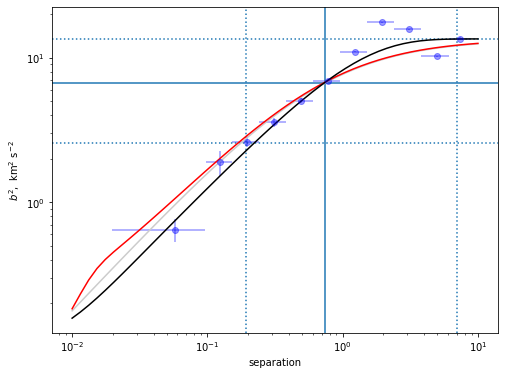

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")


ax.axhline(sig2, ls='-')
ax.axvline(r0, ls='-')

ax.axhline(2*sig2, ls=':')
ax.axvline(r2, ls=':')

ax.axhline(sig, ls=':')
ax.axvline(r1, ls=':')

ax.plot(rgrid, bfunc00(rgrid, r0, sig2, m), color="0.8")
ax.plot(rgrid, bfunc02(rgrid, r0, sig2, m, VF['s0'],0.1), color="red")
ax.plot(rgrid, bfunc03s(rgrid, r0, sig2, m, VF['s0'], 0.1), color="black")


ax.set(xscale='log', yscale='log', 
       xlabel='separation',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

sig2, r0, m

In [17]:
table

s                                                                 \
       count         mean        std          min          25%          50%   
ils                                                                           
0      133.0    10.490179   3.723199     3.263175     6.894423    10.969122   
1      212.0    20.940079   2.644356    16.126740    18.494165    21.178253   
2      470.0    33.027823   4.209059    25.190928    29.390018    33.055700   
3     1191.0    52.211677   6.813963    39.866418    46.406675    52.713178   
4     2938.0    82.678199  10.527538    63.152865    73.928597    83.115182   
5     6586.0   130.836849  16.754849   100.000364   116.612694   131.788035   
6    13289.0   206.694972  26.628453   158.493231   184.029782   207.978555   
7    24266.0   325.572496  42.037448   251.192581   289.485309   326.196725   
8    34426.0   506.603604  66.502213   398.107397   448.227387   503.020371   
9    20374.0   753.618718  91.700575   630.963361   677.736073   733.981791   
10    1195.0  1078.368254  69.843010  1000.047272  1026.218739  1058.738644   

                                   dV2                                \
             75%          max    count       mean        std     min   
ils                                                                    
0      13.609161    15.763344    133.0   0.648062   1.361718  0.0000   
1      23.284081    25.037483    212.0   1.897058   5.629663  0.0000   
2      36.566677    39.804108    470.0   2.635556   4.964697  0.0000   
3      58.134415    63.058163   1191.0   3.586036   8.174079  0.0000   
4      91.600451    99.995020   2938.0   5.063047   9.528644  0.0000   
5     145.423883   158.481432   6586.0   6.959561  10.792622  0.0000   
6     229.703076   251.186637  13289.0  11.022203  14.953526  0.0000   
7     361.795323   398.103730  24266.0  17.657851  21.376486  0.0000   
8     562.214330   630.945214  34426.0  15.804084  20.495457  0.0000   
9     812.765949   999.850584  20374.0  10.244960  14.980418  0.0000   
10   1111.160780  1439.971906   1195.0  13.594338  13.996840  0.0001   

                                             
          25%      50%        75%       max  
ils                                          
0    0.044100  0.22090   0.656100    9.9856  
1    0.108900  0.41605   1.386675   62.7264  
2    0.154075  0.84640   3.195175   53.7289  
3    0.313600  1.34560   3.802500  149.5729  
4    0.422500  1.90440   6.100900  182.7904  
5    0.656100  2.94125   8.643600  130.8736  
6    1.060900  4.79610  15.288100  120.3409  
7    1.768900  8.70250  27.144100  166.4100  
8    1.742400  8.23690  21.715600  207.6481  
9    1.081600  4.75240  13.468900  196.8409  
10   2.576050  9.24160  19.847050   83.1744

In [18]:
M8 = { 'VF' : data,
        'SF' : table,
        's' : s,
        'b2' : b2,
        'sig2' : sig2,
        'pc' : VF['pc'],
        'r0' : r0,
        'r1' : r1,
        'r2' : r2,
        's0' : VF['s0'],
        'm' : m}

In [19]:
f = open('Sfresults\\'+ line + '.pkl',"wb")
pickle.dump(M8,f)
f.close()

class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

jsonfilename = f'SFresults//' + line +'.json'
with open(jsonfilename, "w") as f:
    json.dump(Car, fp=f, indent=3, cls=MyEncoder)
print(jsonfilename, end="")

In [20]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 6.281500577926636 seconds ---
